In [1]:
'''
import pandas as pd
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
'''

from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping

import pandas as pd
import numpy as np
'''
# dimensions of our images.
img_width, img_height = 512, 512

nb_train_samples = 24
nb_validation_samples = 10
nb_epoch = 10
batch_size = 32

input_img = Input(shape=(img_width, img_height, 3))  # adapt this if using `channels_first` image data format
'''
train_data_dir = r'D:\bme\Önlabor\Transaction_Graph\Test\train\train'
validation_data_dir = r'D:\bme\Önlabor\Transaction_Graph\Test\valid\valid'

c:\users\hkris\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
train_df = pd.read_csv('bh_ct_vol_wp_first.csv')

In [3]:
train_df.head()

,block_heights,creation_times,volatilites,weighted_prices
0,493543,2017-11-08 00:11:01,0.003757,7088.678781
1,493544,2017-11-08 00:15:50,0.006280,7088.832442
2,493545,2017-11-08 00:18:30,0.006280,7088.832442
3,498307,2017-12-09 00:00:23,0.045094,15900.335522
4,498308,2017-12-09 00:12:41,0.008015,15887.100513


In [3]:
datagen=ImageDataGenerator(rescale=1./255.,validation_split=0.25)   #validation split!

In [4]:
img_width, img_height = 256, 256

In [5]:
train_generator=datagen.flow_from_dataframe(
dataframe=train_df,
directory=train_data_dir,
x_col="block_heights",
y_col="volatilites",
has_ext=False,      #x_col column doesnt has the file extensions
subset="training",
batch_size=6,
seed=42,
shuffle=True,
class_mode="other",  #for regression other should be used
target_size=(img_width, img_height))



valid_generator=datagen.flow_from_dataframe(
dataframe=train_df,
directory=train_data_dir,
x_col="block_heights",
y_col="volatilites",
has_ext=False,
subset="validation",
batch_size=6,
seed=42,
shuffle=True,
class_mode="other",
target_size=(img_width, img_height))

Found 174 images.
Found 57 images.


In [14]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=(img_width, img_height,3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))


sgd = SGD(lr=0.01, decay=1e-7, momentum=.9)
    
early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')

model.compile(loss='mse', optimizer='rmsprop')

In [15]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=10
                   )

Epoch 1/10
29/29 [==============================] - 102s 4s/step - loss: 166.7360 - val_loss: 0.0017
Epoch 2/10
29/29 [==============================] - 129s 4s/step - loss: 0.0015 - val_loss: 3.3683e-04
Epoch 3/10
29/29 [==============================] - 97s 3s/step - loss: 3.9640e-04 - val_loss: 2.7705e-04
Epoch 4/10
29/29 [==============================] - 94s 3s/step - loss: 3.6671e-04 - val_loss: 1.2788e-04
Epoch 5/10
29/29 [==============================] - 107s 4s/step - loss: 3.3589e-04 - val_loss: 1.2037e-04
Epoch 6/10
29/29 [==============================] - 100s 3s/step - loss: 3.1523e-04 - val_loss: 1.0395e-04
Epoch 7/10
29/29 [==============================] - 96s 3s/step - loss: 3.3758e-04 - val_loss: 1.5435e-04
Epoch 8/10
29/29 [==============================] - 97s 3s/step - loss: 3.5330e-04 - val_loss: 3.3881e-04
Epoch 9/10
29/29 [==============================] - 80s 3s/step - loss: 0.0133 - val_loss: 1.5327e-04
Epoch 10/10
29/29 [==============================] - 80s

In [6]:
from keras import models
from keras import layers
from keras.callbacks import TensorBoard
from keras.applications.inception_v3 import InceptionV3

In [7]:
conv_base = InceptionV3(weights='imagenet', include_top=False, input_shape=(256,256,3))

model = models.Sequential()
model.add(conv_base)
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))

In [9]:
len(model.trainable_weights)

192

In [8]:
conv_base.trainable = False

In [12]:
len(model.trainable_weights)

4

In [12]:
callbacks = [
TensorBoard(
log_dir=r'D:\bme\Szakdolgozat\Volatility_windows\ConvNet\TensorBoard_logdir',
histogram_freq=0,
)]

'''
ValueError: If printing histograms, validation_data must be provided, and cannot be a generator.

Change histogram_freq=10 to histogram_freq=0 you can still use tensor board with this fix 
rather than removing it all together.
'''

'\nValueError: If printing histograms, validation_data must be provided, and cannot be a generator.\n\nChange histogram_freq=10 to histogram_freq=0 you can still use tensor board with this fix \nrather than removing it all together.\n'

In [13]:
sgd = SGD(lr=0.01, decay=1e-7, momentum=.9)
    
early_stop = EarlyStopping(monitor='val_loss', patience=7, verbose=1, mode='auto')

model.compile(loss='mse', optimizer='rmsprop', metrics=['mse', 'mae', 'msle', 'mape', 'cosine'])

In [14]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=20,
                    callbacks=callbacks,
                   )

Epoch 1/20
29/29 [==============================] - 77s 3s/step - loss: 526.0051 - mean_squared_error: 526.0051 - mean_absolute_error: 9.0006 - mean_squared_logarithmic_error: 1.3106 - mean_absolute_percentage_error: 78128.9019 - cosine_proximity: -0.0690 - val_loss: 0.0533 - val_mean_squared_error: 0.0533 - val_mean_absolute_error: 0.1851 - val_mean_squared_logarithmic_error: 0.0035 - val_mean_absolute_percentage_error: 2281.4741 - val_cosine_proximity: 0.4444
Epoch 2/20
29/29 [==============================] - 96s 3s/step - loss: 1.0660 - mean_squared_error: 1.0660 - mean_absolute_error: 0.6913 - mean_squared_logarithmic_error: 0.1522 - mean_absolute_percentage_error: 8357.2131 - cosine_proximity: 0.0805 - val_loss: 0.0053 - val_mean_squared_error: 0.0053 - val_mean_absolute_error: 0.0682 - val_mean_squared_logarithmic_error: 0.0048 - val_mean_absolute_percentage_error: 900.3023 - val_cosine_proximity: -1.0000
Epoch 3/20
29/29 [==============================] - 78s 3s/step - loss: 0.

29/29 [==============================] - 69s 2s/step - loss: 2.7420e-04 - mean_squared_error: 2.7420e-04 - mean_absolute_error: 0.0120 - mean_squared_logarithmic_error: 2.5170e-04 - mean_absolute_percentage_error: 158.6891 - cosine_proximity: -0.9885 - val_loss: 1.3169e-04 - val_mean_squared_error: 1.3169e-04 - val_mean_absolute_error: 0.0100 - val_mean_squared_logarithmic_error: 1.2693e-04 - val_mean_absolute_percentage_error: 139.5899 - val_cosine_proximity: -1.0000
Epoch 19/20
29/29 [==============================] - 69s 2s/step - loss: 2.7304e-04 - mean_squared_error: 2.7304e-04 - mean_absolute_error: 0.0119 - mean_squared_logarithmic_error: 2.5521e-04 - mean_absolute_percentage_error: 155.8825 - cosine_proximity: -1.0000 - val_loss: 1.5687e-04 - val_mean_squared_error: 1.5687e-04 - val_mean_absolute_error: 0.0111 - val_mean_squared_logarithmic_error: 1.5125e-04 - val_mean_absolute_percentage_error: 155.2034 - val_cosine_proximity: -1.0000
Epoch 20/20
29/29 [=======================

In [16]:
history.history

{'cosine_proximity': [-0.06896551792649012,
  0.08045976668938823,
  -0.19540230364635064,
  -0.4712643674735365,
  -0.908045971188052,
  -0.9770114812357672,
  -0.9999999835573393,
  -0.9770114689037718,
  -0.9885057395902174,
  -0.999999975336009,
  -0.9999999917786697,
  -0.9999999773913416,
  -0.9885057354795521,
  -0.9999999938340023,
  -0.9885057395902174,
  -0.9999999897233371,
  -0.9999999897233371,
  -0.9885057395902174,
  -0.9999999917786697,
  -0.9885057416455499],
 'loss': [526.0051020178302,
  1.0659812166644582,
  0.05940373766472852,
  0.005995278758024958,
  0.0051889910206102344,
  0.09849526071938554,
  0.009125132909659817,
  0.003208964189227494,
  0.018942328905691756,
  0.0012025935204041287,
  0.0002704614014184134,
  0.0031400495050108693,
  0.00038017297930341084,
  0.0002698271644099993,
  0.005059340017459332,
  0.0007072380915282149,
  0.0008134859228197582,
  0.00027420402856760434,
  0.000273038053725533,
  0.0003696752763313145],
 'mean_absolute_error': [

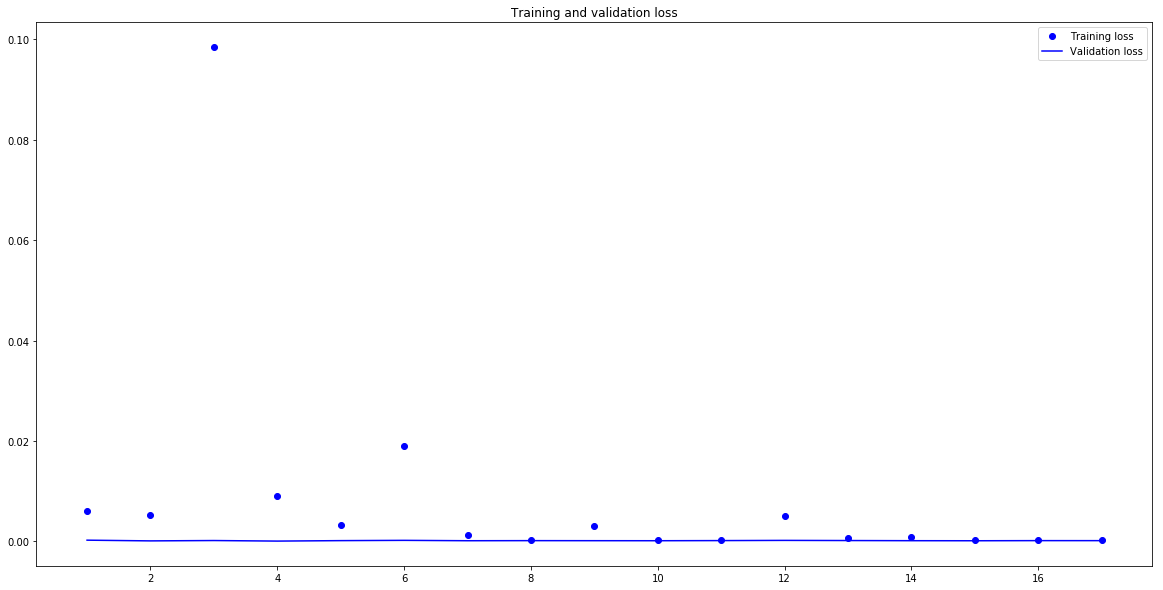

In [23]:
import matplotlib.pyplot as plt

loss = history.history['loss'][3:]
val_loss = history.history['val_loss'][3:]
epochs = range(1, len(loss) + 1)
plt.figure(figsize=(20,10))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
#plt.savefig('/home/hallgato-horvathkristof/Transaction_graphs/first_ConvNet/train_valid_acc.jpg')

In [18]:
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

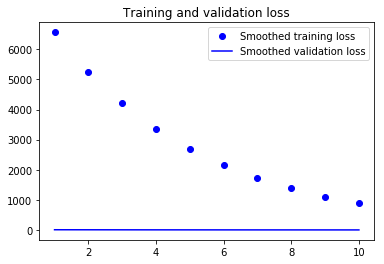

In [20]:
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

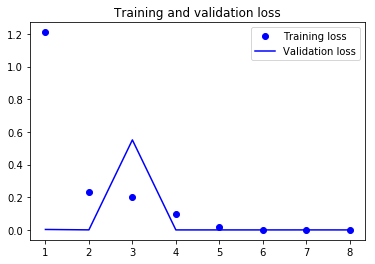

In [25]:
loss = history.history['loss'][2:]
val_loss = history.history['val_loss'][2:]
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

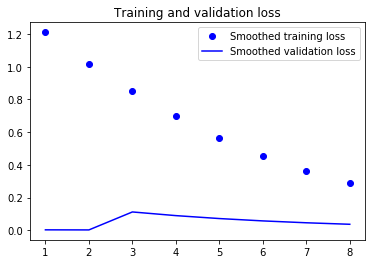

In [26]:
plt.figure()
plt.plot(epochs,
smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()